# Retail Data Analysis
### <br> Name:- Sandeep Anand Pandey
### <br> Date:- 23-Oct-2019
### <br> Dataset :- Retail dataset ( Sales, Features and Store related dataset)

## Importing dataset and initial preprocessing

In [1]:
# importing required packages for data analysis.
import pandas as pd # for reading dataset and manipulation
import matplotlib.pyplot as plt # standard data visulization package.
import seaborn as sns # Data visulization package based on matplotlib.
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
%pylab inline
rcParams['figure.figsize'] = (20, 20)
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


C:\Users\212581841\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['re', 'np', 'mpl', 'sys']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#importing sales,feature and Store dataset
Store_df = pd.read_csv(r'stores data-set.csv')
Feature_df = pd.read_csv(r'Features data set.csv')
Sales_df = pd.read_csv(r'sales data-set.csv')

In [3]:
#printing the size of the dataset.
print(Store_df.shape)
print(Feature_df.shape)
print(Sales_df.shape)

(45, 3)
(8190, 12)
(421570, 5)


In [4]:
# Print Store dataset info.
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [5]:
# Print Feature dataset info.
Feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [6]:
# Print Sales Dataset info.
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
# Convert the daa type of Date column to date type as in the above staeps its not in appropriate format.
Feature_df['Date'] = pd.to_datetime(Feature_df['Date'])
Sales_df['Date'] = pd.to_datetime(Sales_df['Date'])

# Merging Sales, Feature and Store dataset. 

In [8]:
# Merging Sales and Featire dataset on columns Store , Date and Is Holiday column(commom in both dataset)
data_intermediate = pd.merge(Sales_df,Feature_df, on=['Store','Date','IsHoliday'], how='left')
data = pd.merge(data_intermediate,Store_df, how='left', on= ['Store'])

In [9]:
# Printing combined data info.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
Temperature     421570 non-null float64
Fuel_Price      421570 non-null float64
MarkDown1       150681 non-null float64
MarkDown2       111248 non-null float64
MarkDown3       137091 non-null float64
MarkDown4       134967 non-null float64
MarkDown5       151432 non-null float64
CPI             421570 non-null float64
Unemployment    421570 non-null float64
Type            421570 non-null object
Size            421570 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(10), int64(3), object(1)
memory usage: 51.9+ MB


In [10]:
# Finding null values in each columns
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [11]:
# filling NA value with 0 as there are four numeric columns having null value.
data = data.fillna(0)

In [12]:
# Finding if data have duplicates.
data.duplicated().sum() # All the record in the dataset are unique.

0

In [13]:
# FInding five point summary of the combined dataset.
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00,421570.00
mean,22.20,44.26,15981.26,60.09,3.36,2590.07,879.97,468.09,1083.13,1662.77,171.20,7.96,136727.92
std,12.79,30.49,22711.18,18.45,0.46,6052.39,5084.54,5528.87,3894.53,4207.63,39.16,1.86,60980.58
min,1.00,1.00,-4988.94,-2.06,2.47,0.00,-265.76,-29.10,0.00,0.00,126.06,3.88,34875.00
25%,11.00,18.00,2079.65,46.68,2.93,0.00,0.00,0.00,0.00,0.00,132.02,6.89,93638.00
50%,22.00,37.00,7612.03,62.09,3.45,0.00,0.00,0.00,0.00,0.00,182.32,7.87,140167.00
75%,33.00,74.00,20205.85,74.28,3.74,2809.05,2.20,4.54,425.29,2168.04,212.42,8.57,202505.00
max,45.00,99.00,693099.36,100.14,4.47,88646.76,104519.54,141630.61,67474.85,108519.28,227.23,14.31,219622.00


In [14]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.57,0.00,0.00,0.00,0.00,0.00,211.10,8.11,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.55,0.00,0.00,0.00,0.00,0.00,211.24,8.11,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.51,0.00,0.00,0.00,0.00,0.00,211.29,8.11,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.56,0.00,0.00,0.00,0.00,0.00,211.32,8.11,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.62,0.00,0.00,0.00,0.00,0.00,211.35,8.11,A,151315


# Task 1:- Run a ANOVA-test to determine the Significant groups between Holiday v/s No-Holiday

<b>What is ANOVA (Analysis Of Variance)?</b>
<br>
<br>
ANOVA is used to compare the means of more than 2 groups (t-test can be used to compare 2 groups)
groups mean differences inferred by analyzing variances
<br>
<br>
<b>Main types</b>:-  One-way (one factor) and two-way (two factors) ANOVA (factor is an independent variable)

<b>Null Hypothesis:- Holiday and Non Holidays not have any impact on weekly sales. mean(Holiday)= mean(noHoliday)

In [15]:
data1  = data[['Weekly_Sales','IsHoliday']]

In [16]:
True_record1 = data1[data1['IsHoliday']== True]
true_record1 = True_record1['Weekly_Sales']

In [17]:
False_records1 = data1[data1['IsHoliday']== False]
false_record1 = False_records1['Weekly_Sales']

In [18]:
# Creating an empty dictionary 
x = ['True', 'False']
district_dict = {}
  
# Adding list as value 
district_dict["True"] = true_record1 
district_dict["False"] = false_record1  
  

True_std : 27222.000408958855
False_std : 22330.747449502676


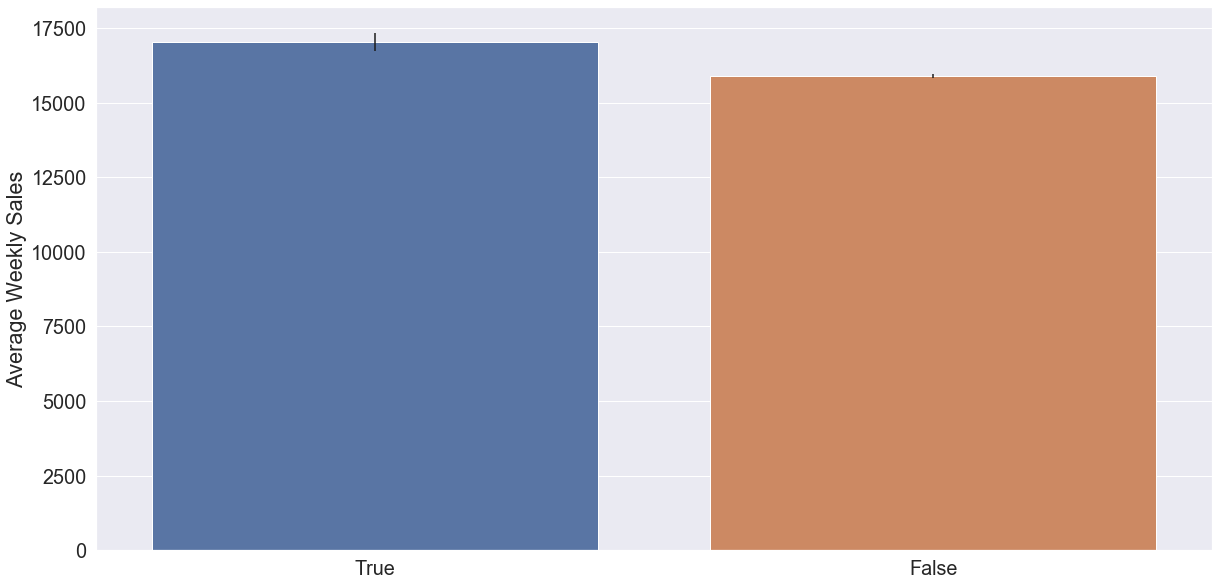

In [19]:
y = []
yerror = []
#Assigns the mean score and 95% confidence limit to each district
for district in x:
    y.append(district_dict[district].mean())
    yerror.append(1.96*district_dict[district].std()/np.sqrt(district_dict[district].shape[0]))    
    print(district + '_std : {}'.format(district_dict[district].std()))
    
sns.set(font_scale=1.8)
fig = plt.figure(figsize=(20,10))
ax = sns.barplot(x, y, yerr=yerror)
ax.set_ylabel('Average Weekly Sales')
plt.show()


In [20]:
stats.f_oneway(district_dict['True'], district_dict['False'])

F_onewayResult(statistic=68.8029912658499, pvalue=1.091222267254605e-16)

#### The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among Holiday vs NoHoliday.

#### From our data exploration, we can see that the average Weekly Sales different for each district group. The resulting pvalue was less than 0.05. We can reject the null hypothesis and conclude that there is a significant difference between the Weekly Sales for each district

#### Note:-  Even though we've obtained a very low p-value, we cannot make any assumptions about the magnitude of the effect.

In [21]:
districts = ['True', 'False']

ss_b = 0
for d in districts:
    ss_b += district_dict[d].shape[0] * \
            np.sum((district_dict[d].mean() - data1['Weekly_Sales'].mean())**2)

ss_w = 0
for d in districts:
    ss_w += np.sum((district_dict[d] - district_dict[d].mean())**2)

msb = ss_b/1
msw = ss_w/(len(data1)-2)
f=msb/msw
print('F_statistic: {}'.format(f))

F_statistic: 68.80299126584259


#### We can calculate the magnitude of the effect to determine how large the difference is. One of the measures we can use is Eta-squared.

In [22]:
# Calculating Eta -Square.
ss_t = np.sum((data1['Weekly_Sales']-data1['Weekly_Sales'].mean())**2)        
eta_squared = ss_b/ss_t
print('eta_squared: {}'.format(eta_squared))

eta_squared: 0.00016318070618533695


#### The general rules of thumb given by Cohen and Miles & Shevlin (2001) for analyzing eta-squared, η2:
#### <br>Small effect: 0.01
#### <br>Medium ffect: 0.06
#### <br>Large effect: 0.14
#### <br>From our calculations, the effect size for this ANOVA test would be "Small"

# Task 2:- Perform EDA to determine the aggregated sales(Sum & Avg) per store for each-year(52-weeks). Using this result, also identify whether the Sales were high during Holiday or No-Holiday by each year

### Plotting weekly sales over the period of the time

C:\Users\212581841\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


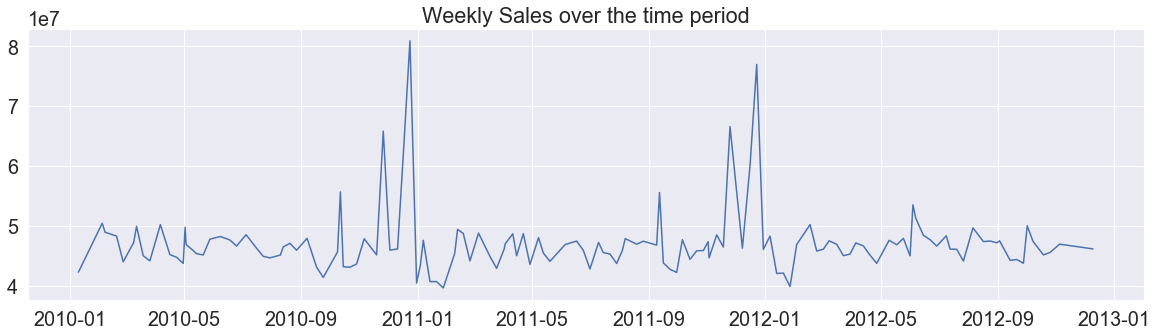

In [23]:
data_in = pd.merge(Feature_df, Sales_df, on=['Store', 'Date', 'IsHoliday'], how='inner')
# Plotting Weekly Sales over the year 
data_in_analysis = data_in.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
data_in_analysis.sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(20,5))
plt.title("Weekly Sales over the time period")
plt.plot(data_in_analysis.Date, data_in_analysis.Weekly_Sales)
plt.show()

In [24]:
# Deriving year from the Column Date.
Sales_temp = Sales_df.copy()

In [25]:
Sales_temp['Year'] = Sales_temp['Date'].dt.year

In [26]:
# Performing Groupby operation in the Sales_temp dataset.
aggregation = {'Weekly_Sales':  'sum'}
Sales_Aggregated_Sum = Sales_temp.groupby(['Store','Year','IsHoliday']).agg(aggregation).add_prefix('Total ').reset_index()
aggregation = {'Weekly_Sales': 'mean'}
Sales_Aggregated_Average = Sales_temp.groupby(['Store','Year','IsHoliday']).agg(aggregation).add_prefix('Average ').reset_index()

In [27]:
Aggregated_Sales = pd.merge(Sales_Aggregated_Sum,Sales_Aggregated_Average, how='left', on=['Store','Year','IsHoliday'])

### Dataset (Aggregated Sales) for finding total weekly sales and Average weekly sales 

In [28]:
Aggregated_Sales.head()

,Store,Year,IsHoliday,Total Weekly_Sales,Average Weekly_Sales
0,1,2010,False,66806469.75,21168.08
1,1,2010,True,6472362.25,22551.78
2,1,2011,False,74201049.28,21595.18
3,1,2011,True,6720869.55,23175.41
4,1,2012,False,64737813.26,22102.36


### Visualizing Sum of Weekly sales and Average Weekly sale for 45 different store for each year 


In [29]:
aggregation = {'Weekly_Sales':  'sum'}
Sales_Aggregated_Sum1 = Sales_temp.groupby(['Store','Year']).agg(aggregation).add_prefix('Total ').reset_index()
#Sales_Aggregated_Sum1.Store = Sales_Aggregated_Sum1.Store.astype(str)
Sales_Aggregated_Sum1.Year = Sales_Aggregated_Sum1.Year.astype(str)
aggregation = {'Weekly_Sales': 'mean'}
Sales_Aggregated_Average1 = Sales_temp.groupby(['Store','Year']).agg(aggregation).add_prefix('Average ').reset_index()
#Sales_Aggregated_Average1.Store = Sales_Aggregated_Average1.Store.astype(str)
Sales_Aggregated_Average1.Year = Sales_Aggregated_Average1.Year.astype(str)

In [30]:
Sales_Aggregated_Average1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
Store                   135 non-null int64
Year                    135 non-null object
Average Weekly_Sales    135 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ KB


### Year wise distribution of Total Weekly Sales for each store.

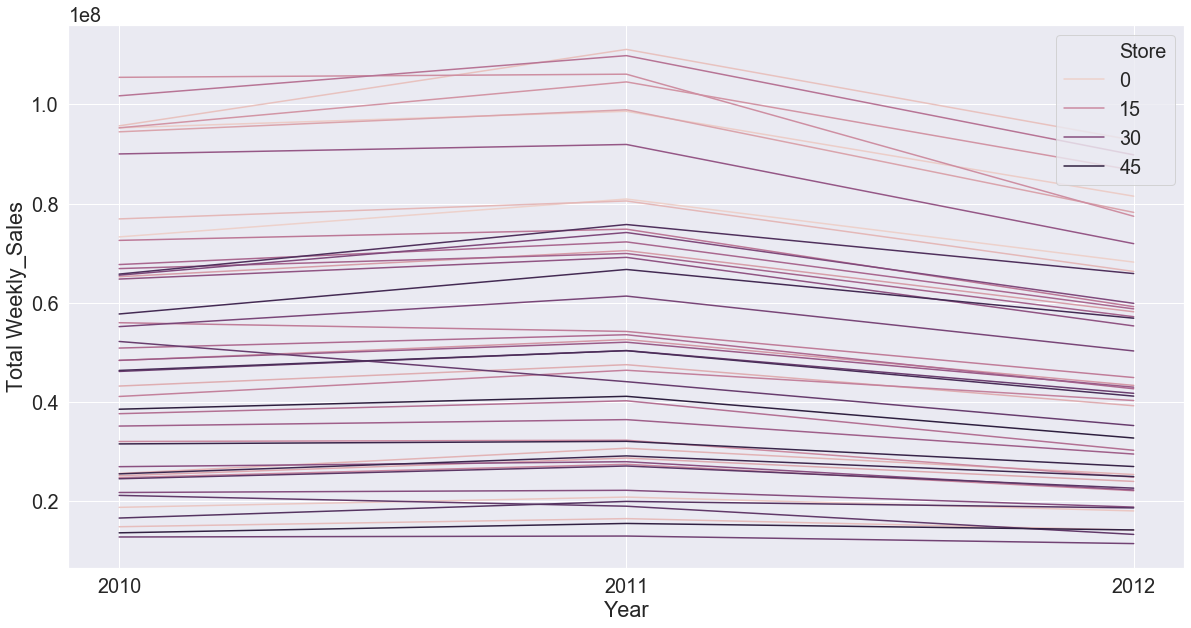

In [31]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="Year", y="Total Weekly_Sales",hue="Store", data=Sales_Aggregated_Sum1)

### Yearwise distribution of Average weekly sale for each store.See below lineplot
 

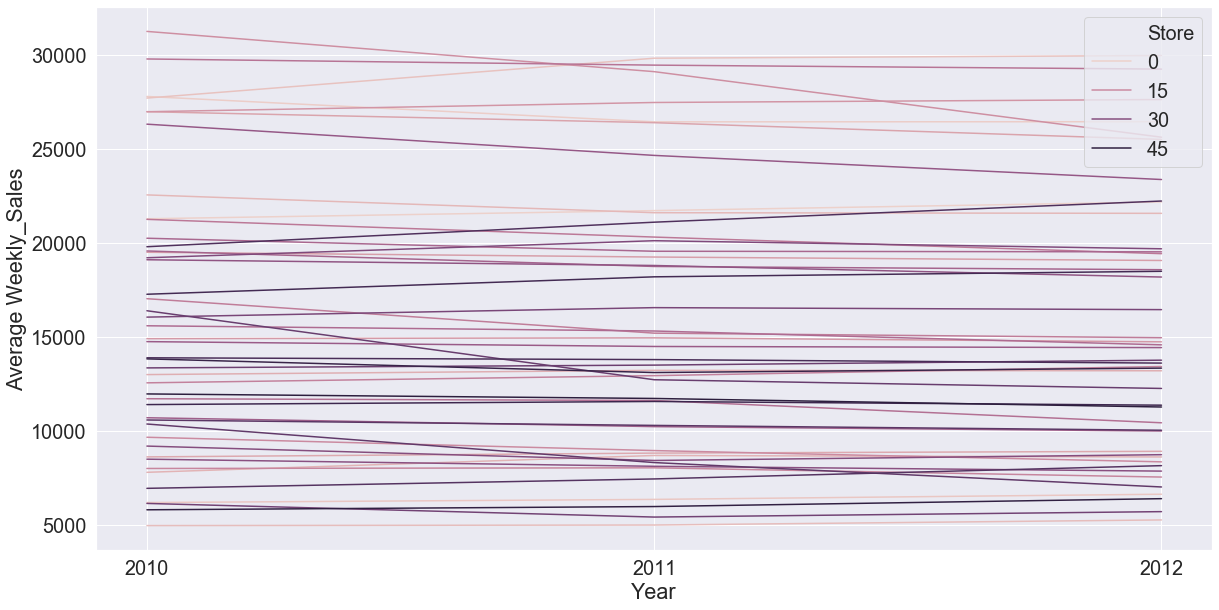

In [32]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="Year", y="Average Weekly_Sales",hue="Store", data=Sales_Aggregated_Average1)

### For isHoliday= False total weekly sale is high throughout three year(2010,2011,2012).  See below Barplot


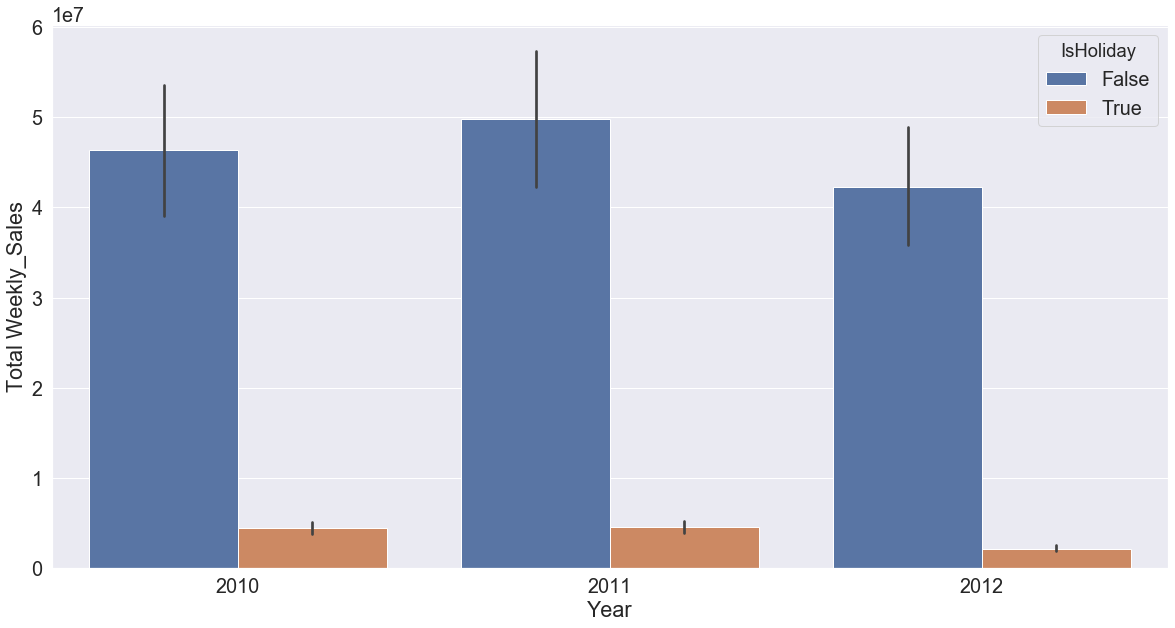

In [33]:
# Total Weekly Sales Per year 
plt.figure(figsize=(20,10))
ax = sns.barplot(x="Year", y="Total Weekly_Sales", hue="IsHoliday", data=Aggregated_Sales)

### Average weekly sales for Isholiday = True is always greater than IsHoliday=False for all the three years.Therefore we can say Average Weekly Sales were high during Holidays. See below Barplot


In [34]:
# Aggregating average weekly sales data using groupby on Year and Isholiday Status.
aggregation = {'Average Weekly_Sales':  'mean'}
Average_Weekly_Sales = Aggregated_Sales.groupby(['Year','IsHoliday']).agg(aggregation).add_prefix('Average ').reset_index()

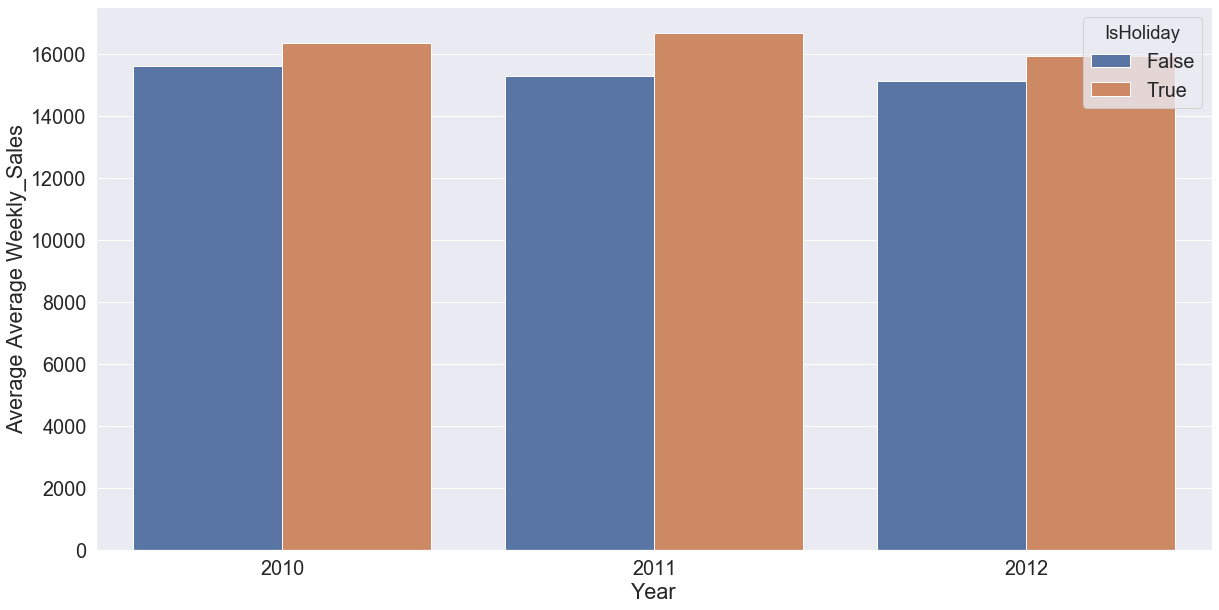

In [35]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="Year", y="Average Average Weekly_Sales", hue="IsHoliday", data=Average_Weekly_Sales)

# Task 3:- Determine the Significant-Features marrying Sales data against Features data for all-stores combined

## Finding Correlation between features of dataset created using Sales and Feature dataframe.  See below heatmap

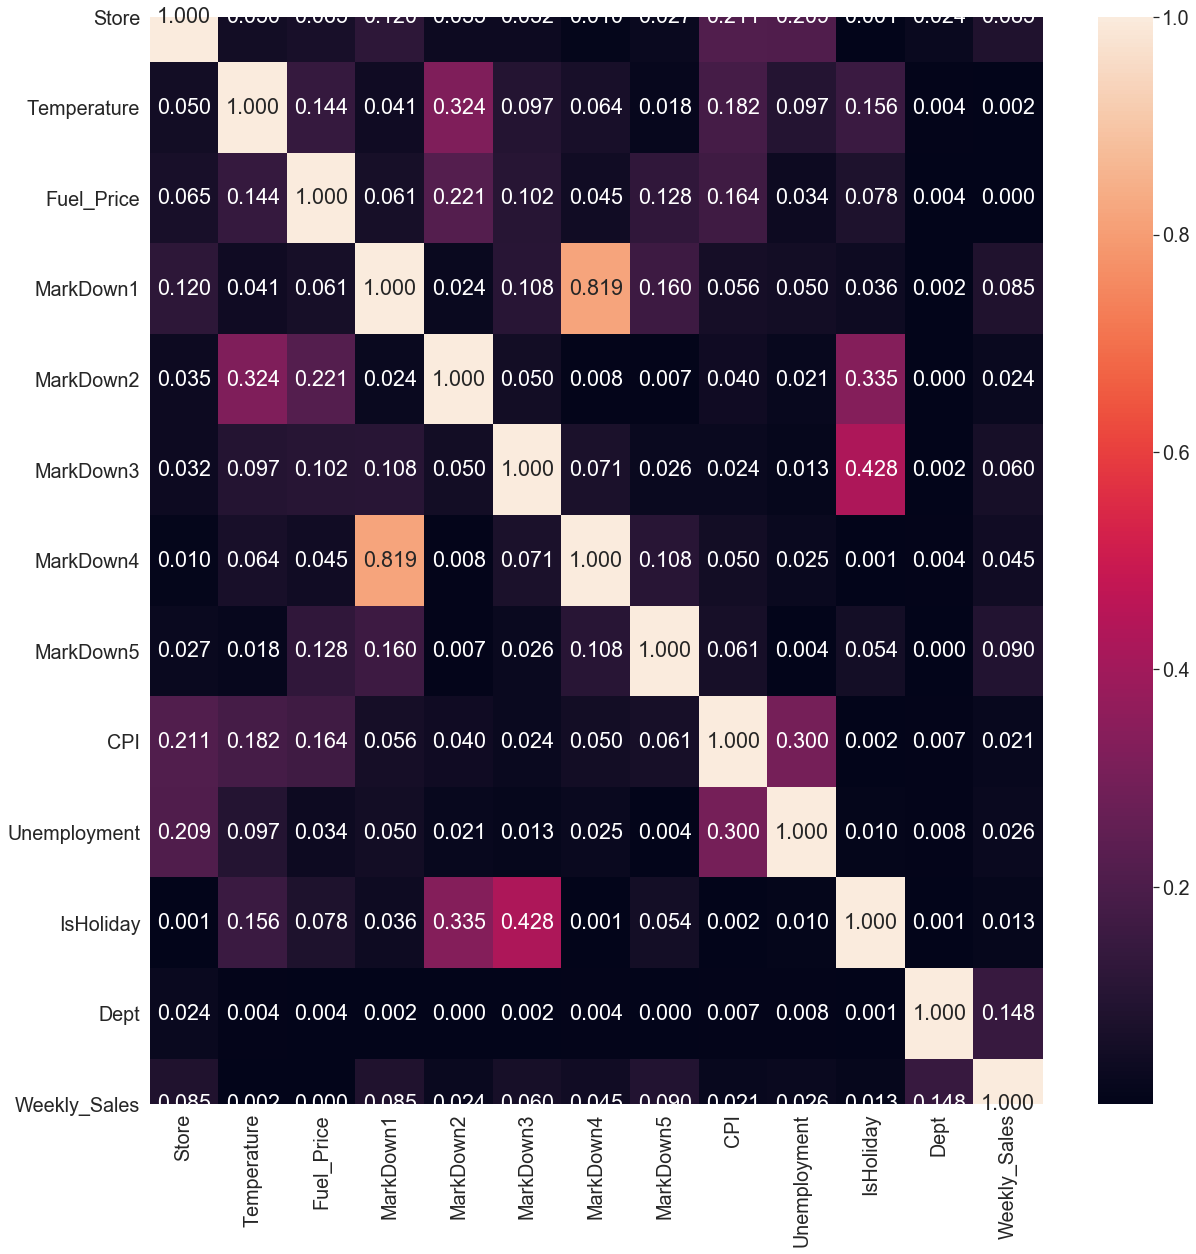

In [36]:

data_in = pd.merge(Feature_df, Sales_df, on=['Store', 'Date', 'IsHoliday'], how='inner')
# Correlation between different features in the dataset.
corr = data_in.corr()
corr = abs(corr)
plt.figure(figsize=(20,20))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

## Applying Random Forest Regression to predict weekly sales and Feature Importance. 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
data_in = data_in.fillna(0)
data_in = data_in.drop(columns = ['Date'])
data_in[['IsHoliday']] = data_in[['IsHoliday']].astype(int)
data_in = data_in[['Store', 'Temperature', 'Fuel_Price','CPI', 'Unemployment','IsHoliday', 'Dept', 'Weekly_Sales']]
x = data_in.drop(columns=['Weekly_Sales'])
y = data_in['Weekly_Sales']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.1, random_state = 0)
print(xTrain.shape, yTrain.shape)

(379413, 7) (379413,)


In [38]:
# Building Random forest model on the dataset.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=50, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
model.fit(xTrain, yTrain)
yPredict = pd.Series(model.predict(xTest))
err = mean_absolute_error(yTest, yPredict)
print('{:.3f}'.format(err))

1918.030


In [39]:
# Calculating Model Features.
model.score(xTest, yTest)

0.925259981267753

In [40]:
Feature_importance = pd.DataFrame({"Feature":x.columns,"Importance":model.feature_importances_})
Feature_importance = Feature_importance.sort_values(['Importance'],ascending=False)

### Feature importance for weekly sales Prediction. See below barplot. 

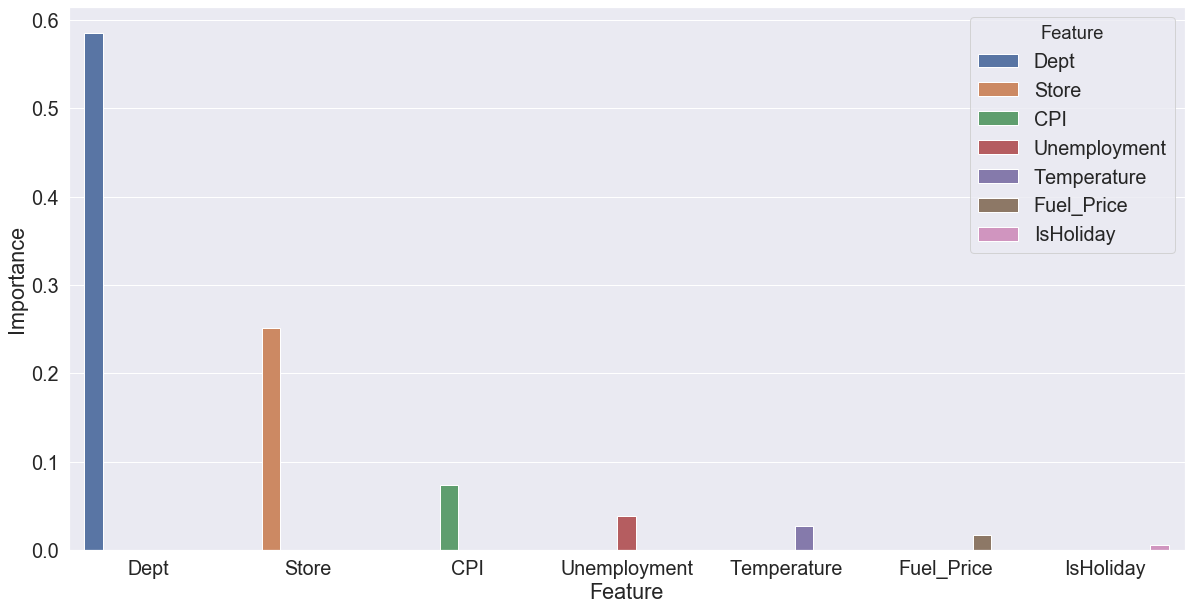

In [41]:
# Plotting Feature importance
plt.figure(figsize=(20,10))
ax = sns.barplot('Feature', 'Importance', hue='Feature', data= Feature_importance)

# Task 4:- Cluster the Stores based on Features & determine the Store-segments

In [42]:
# Aggregating the Stores featires.
# Total Sales = Sum of weekly sales for every unique store
# Dept = Unique number of department for every unique store
# Temprature :- Average temperature for every unique store.
# Fuel_Price = Averge fuel price for every unique store
# CPI = Average CPI for every unique store
# Unemployment = Average Unemployment for every unique store
# Type = Uniique count of type of Store for every unique store
# Size = Average Store size for every unique store
# Average_Sales = Average sales for each unique store
aggregation = {"Weekly_Sales": np.sum, "Dept": pd.Series.nunique,"Temperature": np.mean,"Fuel_Price": np.mean,"CPI": np.mean,
               "Unemployment": np.mean,"Type": pd.Series.nunique,"Size": np.mean}
Store_Cluster_data_Sum = data.groupby(['Store']).agg(aggregation).reset_index()
aggregation = {"Weekly_Sales": np.mean, "Dept": pd.Series.nunique,"Temperature": np.mean,"Fuel_Price": np.mean,"CPI": np.mean,
               "Unemployment": np.mean,"Type": pd.Series.nunique,"Size": np.mean}
Store_Cluster_data_Average = data.groupby(['Store']).agg(aggregation).reset_index()
#Store_Cluster_data_Average = Store_Cluster_data_Average.rename(columns={'Weekly_Sales':'Average_Sales'})
Store_Cluster_data_Sum['Average_Sales'] = Store_Cluster_data_Average['Weekly_Sales']
Store_Cluster_data = Store_Cluster_data_Sum.rename(columns={'Weekly_Sales':'Total_Sales'})

In [43]:
# Normalizing different features present in the dataset.
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
Store_Cluster_data[['Total_Sales','Size','Average_Sales','Temperature','CPI']] = mm_scaler.fit_transform(Store_Cluster_data[['Total_Sales','Size','Average_Sales','Temperature','CPI']])

C:\Users\212581841\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [44]:
Store_Cluster_data.head()

,Store,Total_Sales,Dept,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Average_Sales
0,1,0.70,77,0.77,3.22,0.96,7.61,1,0.63,0.68
1,2,0.90,78,0.77,3.22,0.96,7.62,1,0.91,0.89
2,3,0.08,72,0.85,3.22,1.00,7.18,1,0.01,0.05
3,4,0.99,78,0.61,3.22,0.00,5.97,1,0.93,0.99
4,5,0.03,72,0.80,3.22,0.97,6.30,1,0.00,0.00


In [45]:
# Selecting Columns in the dataset except Store number.
X = Store_Cluster_data.iloc[:, [1,2,3,4,5,6,7,8,9]].values

In [46]:
# For finding optimal number of k in k mean clustering we are using silhouette_score.We will select the k which will have maximum silhouette_score.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#Use silhouette score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.7761939898701845)
For n_clusters = 3, silhouette score is 0.4859379913073975)
For n_clusters = 4, silhouette score is 0.5154510731253465)
For n_clusters = 5, silhouette score is 0.400028010230884)
For n_clusters = 6, silhouette score is 0.3414806429941765)
For n_clusters = 7, silhouette score is 0.34844931256220185)
For n_clusters = 8, silhouette score is 0.3568299908962044)
For n_clusters = 9, silhouette score is 0.3836885042220113)


### Maximum silhouette_score is for k = 2

In [47]:
# Intiatilizing K mean with k = 2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [48]:
# Get the cluster centroids
print(kmeans.cluster_centers_)
    
# Get the cluster labels
print(kmeans.labels_)

[[4.97731337e-01 7.65135135e+01 5.15280092e-01 3.35818086e+00
  4.73095663e-01 7.83487079e+00 1.00000000e+00 6.21700034e-01
  4.81828705e-01]
 [9.40414096e-02 6.25000000e+01 7.95262887e-01 3.37245104e+00
  4.65137859e-01 8.73740068e+00 1.00000000e+00 2.96689527e-02
  1.60177529e-01]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1
 1 0 0 0 1 1 1 0]


In [49]:
# appending clustering result in Store Cluster dataset
Store_Cluster_data['Cluster'] = kmeans.labels_

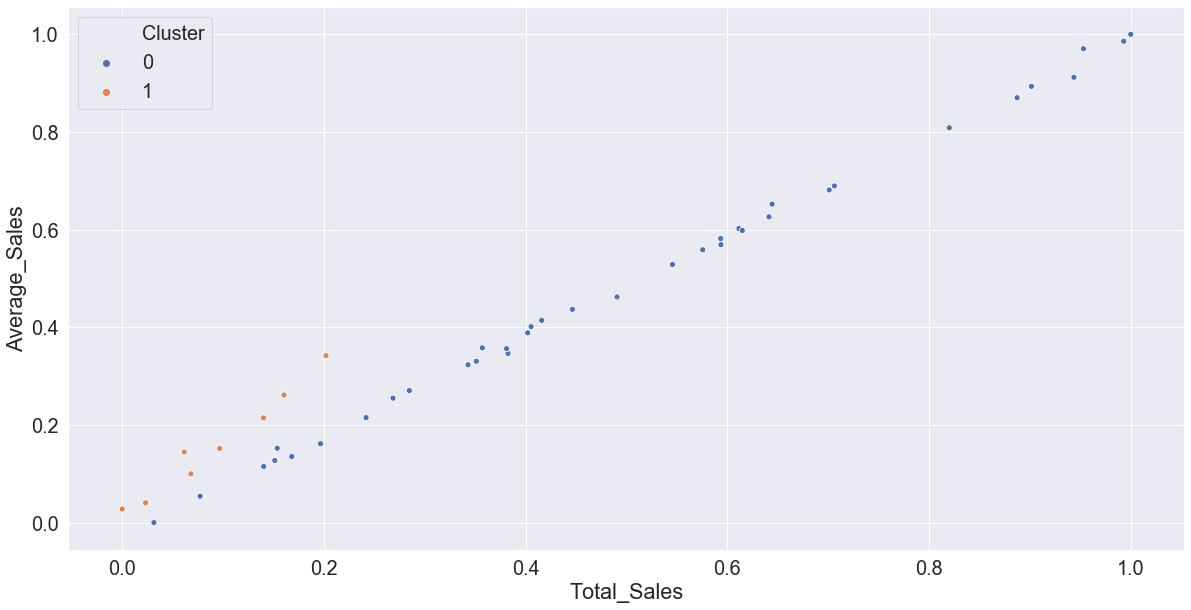

In [50]:
# Plotting clustering result.
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="Total_Sales", y="Average_Sales", hue="Cluster",data=Store_Cluster_data)

### Top 3 Feature which are playing important role in segmeting the stores (based on cluster center) are :- Total Sales,Average Sales, Size

In [51]:
# Get the cluster centroids
print(kmeans.cluster_centers_)

[[4.97731337e-01 7.65135135e+01 5.15280092e-01 3.35818086e+00
  4.73095663e-01 7.83487079e+00 1.00000000e+00 6.21700034e-01
  4.81828705e-01]
 [9.40414096e-02 6.25000000e+01 7.95262887e-01 3.37245104e+00
  4.65137859e-01 8.73740068e+00 1.00000000e+00 2.96689527e-02
  1.60177529e-01]]
